# Feature creation - Numerical features ( Feature Transformation )

2. Square root transformation

Imagine you're looking at the number of likes different videos get online. Some videos might get a few hundred likes, others might get thousands, and a few viral ones could get millions!

If you were to compare these numbers directly, the videos with millions of likes would seem incredibly far away from the ones with just a few hundred. It can be hard to see the relative difference between the videos with smaller numbers of likes.

Square root transformation is like using a special magnifying glass that helps us see the differences in the smaller numbers more clearly, while also shrinking down the really huge numbers a bit.

Think of it like this:

1. The square root of 9 is 3.
2. The square root of 100 is 10.
3. The square root of 10,000 is 100.
4. The square root of 1,000,000 is 1000.

Notice how the gap between 9 and 100 is big (91), but the gap between their square roots (3 and 10) is smaller (7). Similarly, the huge gap between 10,000 and 1,000,000 becomes a much smaller gap between their square roots (100 and 1000).

Here's a simple example with video likes:

Let's say we have the following number of likes for some videos:

100

400

900

1600

10000

Now, let's apply the square root transformation to these numbers:

1. Square root of 100 is 10
2. Square root of 400 is 20
3. Square root of 900 is 30
4. Square root of 1600 is 40
5. Square root of 10000 is 100

See how the original numbers had increasingly larger gaps between them? After the square root transformation, the gaps are more consistent (all 10s, except the last one which is larger but still relatively smaller than the original jump).

Why is this useful?

1. Reduces the impact of very large values: Just like the log transformation, the square root transformation helps to bring extreme values closer to the rest of the data. This can be useful when these extreme values might be skewing our analysis or confusing our computer models.
2. Makes differences in smaller values more apparent: By shrinking the larger values, the differences between the smaller values become relatively more significant and easier to see.
3. Can help with data that has a "square" relationship: In some cases, the relationship between things might be based on squares (like the area of a square depending on its side length). A square root transformation can sometimes help reveal a more linear relationship, which is easier for some computer models to understand.

In simple terms, the square root transformation is like a tool that helps us balance out the range of our data. It makes the big numbers less overwhelming and allows us to see the finer details in the smaller numbers more clearly. It's another way to get a better perspective on data that has a wide spread of values.





# 1. Import necessary libraries

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Create dataset

In [82]:
# 1. Real-life Example: Number of Likes on Online Videos

# Imagine you have data on the number of likes different videos received.
# This data can be highly skewed, with a few viral videos having millions of likes.

video_likes = [
    150, 220, 180, 300, 250, 100, 50, 600, 450, 120,
    200, 280, 160, 350, 210, 80, 70, 1200, 900, 150,
    250, 310, 190, 400, 270, 110, 90, 1800, 750, 220,
    300, 260, 140, 420, 230, 130, 60, 2400, 500, 180,
    # Imagine many more videos with likes in the hundreds or low thousands
]

# 3. Add skewed datapoints to the dataset

In [83]:
# Let's add some viral videos with significantly higher likes
video_likes += [10000, 50000, 200000, 1500000]

In [73]:
# Create a Pandas Series
video_likes_original = pd.Series(video_likes + list(np.random.randint(50, 1000, 90)) + list(np.random.randint(1000, 5000, 10)),name='Original Video Likes')

# 4. Visualize the Video Likes distribution

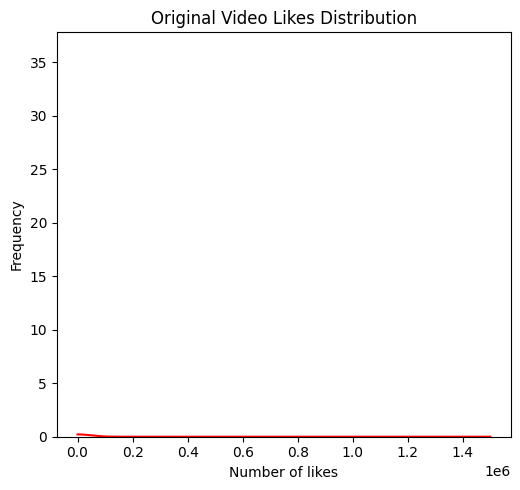

In [84]:
# Visualize the original distribution
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.histplot(video_likes_original, kde=True , color='Red')
plt.title('Original Video Likes Distribution')
plt.xlabel('Number of likes')
plt.ylabel('Frequency');


plt.tight_layout()
plt.show()

Not Visible at all since some the values are very high

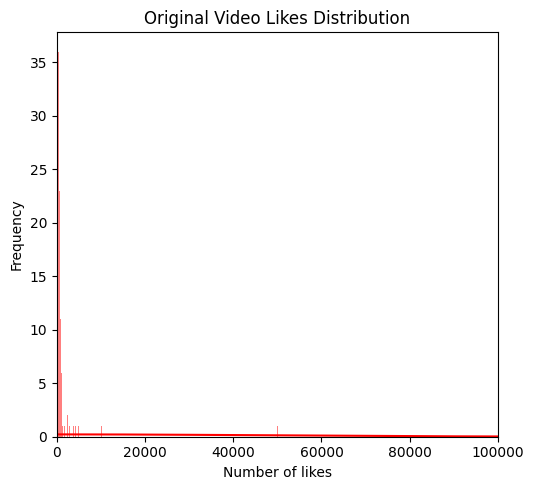

In [85]:
# Visualize till 1 lakh views
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.histplot(video_likes_original, kde=True , color='Red')
plt.title('Original Video Likes Distribution')
plt.xlabel('Number of likes')
plt.ylabel('Frequency');
plt.xlim(0, 100000)  # Adjust this limit as needed based on your data

plt.tight_layout()
plt.show()

Most of the likes are below 5000

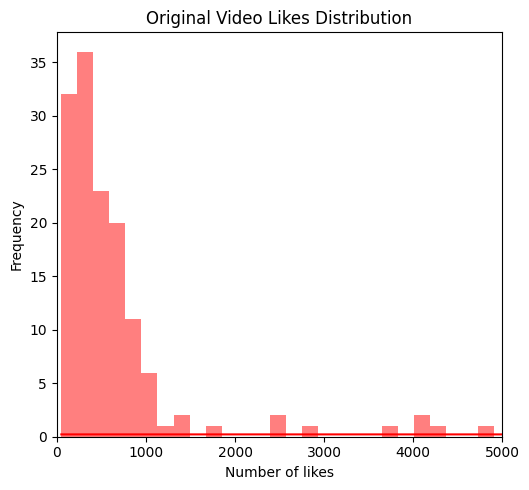

In [86]:
# Visualize till 5000 likes
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.histplot(video_likes_original, kde=True , color='Red')
plt.title('Original Video Likes Distribution')
plt.xlabel('Number of likes')
plt.ylabel('Frequency');
plt.xlim(0, 5000)  # Adjust this limit as needed based on your data

plt.tight_layout()
plt.show()

# 5. Feature transformation using square root transformation

In [87]:
# Apply Square Root Transformation
video_likes_sqrt = np.sqrt(video_likes_original)

In [88]:
sqrt_transformed_likes = pd.Series(video_likes_sqrt, name='sqrt of Video Likes')

# 6. Visualize the Square root transformed feature

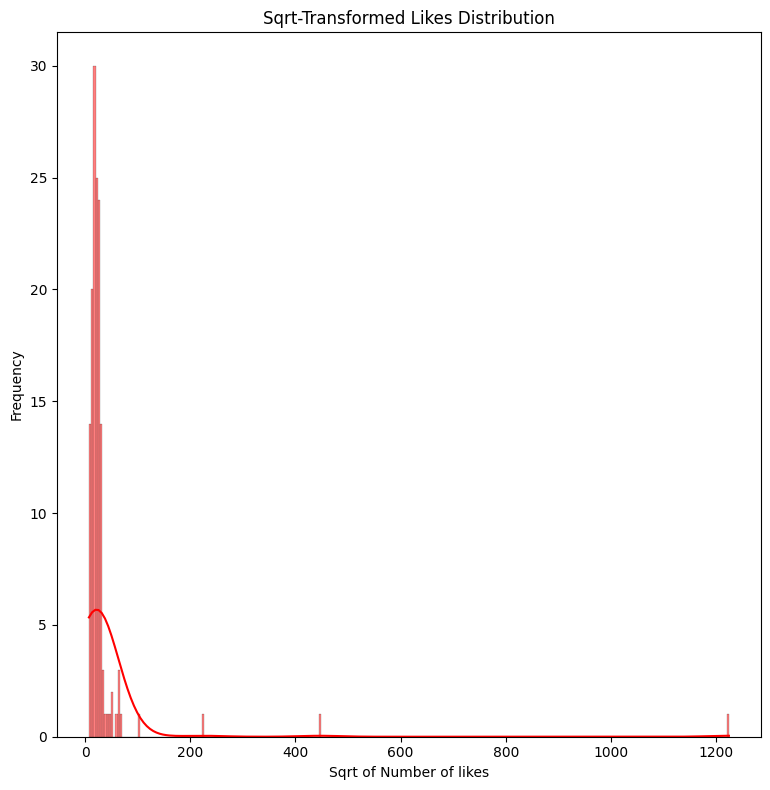

In [89]:
# Visualize the transformed distribution
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 2)
sns.histplot(sqrt_transformed_likes, kde=True , color='Red')
plt.title('Sqrt-Transformed Likes Distribution')
plt.xlabel('Sqrt of Number of likes')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Inference : The square root transformation has likely made the distribution of the number of likes less skewed and potentially closer to a normal distribution by compressing the higher values.

Mathematical Form: y' = √y or y' = y^(1/2)

When to Use:

1. Moderate Right Skew: Useful for data that is moderately right-skewed. It has a weaker effect than the log transformation.
2. Count Data: Often used for count data, especially when the variance is proportional to the mean (following a Poisson-like distribution).

How it Helps:

1. Reducing Right Skewness: Pulls in the long tail, making the distribution more symmetric.
2. Stabilizing Variance: Can help stabilize variance, although often less effectively than the log transformation for highly skewed data.

Important Considerations:

1. Non-Negative Data: Requires non-negative data (values greater than or equal to zero).
2. Interpretation: Similar to the log transformation, interpretation needs to be done carefully, considering the transformed scale.

# 7. Comparing the 2 columns

In [90]:
# Create DataFrame using pd.concat()
df_concat = pd.concat([video_likes_original, sqrt_transformed_likes], axis=1 )
df_concat

,Original Video Likes,sqrt of Video Likes
0,150,12.247449
1,220,14.832397
2,180,13.416408
3,300,17.320508
4,250,15.811388
...,...,...
139,2763,52.564246
140,4094,63.984373
141,1339,36.592349
142,2458,49.578221


So while considering in a model we should consider the 'sqrt of Video Likes' column